## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [10]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [11]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
"""
請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
"""Code Here
建立你的神經網路
請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650 

In [21]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [22]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [23]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 114us/step - loss: 1.9458 - accuracy: 0.2859 - val_loss: 1.7908 - val_accuracy: 0.3431
Epoch 2/100
50000/50000 [==============================] - 6s 114us/step - loss: 1.7365 - accuracy: 0.3711 - val_loss: 1.6807 - val_accuracy: 0.3922
Epoch 3/100
50000/50000 [==============================] - 6s 115us/step - loss: 1.6565 - accuracy: 0.4042 - val_loss: 1.5932 - val_accuracy: 0.4269
Epoch 4/100
50000/50000 [==============================] - 6s 117us/step - loss: 1.5737 - accuracy: 0.4363 - val_loss: 1.5807 - val_accuracy: 0.4283
Epoch 5/100
50000/50000 [==============================] - 6s 114us/step - loss: 1.5298 - accuracy: 0.4507 - val_loss: 1.5447 - val_accuracy: 0.4489
Epoch 6/100
50000/50000 [==============================] - 6s 117us/step - loss: 1.4940 - accuracy: 0.4634 - val_loss: 1.5258 - val_accuracy: 0.4499
Epoch 7/100
50000/50000 [==============================

Epoch 54/100
50000/50000 [==============================] - 5s 109us/step - loss: 0.6040 - accuracy: 0.7822 - val_loss: 1.9668 - val_accuracy: 0.5142
Epoch 55/100
50000/50000 [==============================] - 6s 111us/step - loss: 0.5923 - accuracy: 0.7854 - val_loss: 2.0393 - val_accuracy: 0.5009
Epoch 56/100
50000/50000 [==============================] - 6s 111us/step - loss: 0.5892 - accuracy: 0.7880 - val_loss: 1.9503 - val_accuracy: 0.5133
Epoch 57/100
50000/50000 [==============================] - 5s 110us/step - loss: 0.5703 - accuracy: 0.7944 - val_loss: 2.0591 - val_accuracy: 0.5060
Epoch 58/100
50000/50000 [==============================] - 5s 110us/step - loss: 0.5537 - accuracy: 0.7974 - val_loss: 2.0301 - val_accuracy: 0.5024
Epoch 59/100
50000/50000 [==============================] - 6s 111us/step - loss: 0.5428 - accuracy: 0.8040 - val_loss: 2.0615 - val_accuracy: 0.5069
Epoch 60/100
50000/50000 [==============================] - 5s 110us/step - loss: 0.5429 - accuracy:

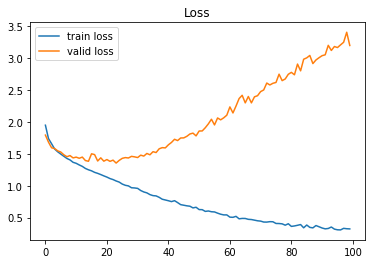

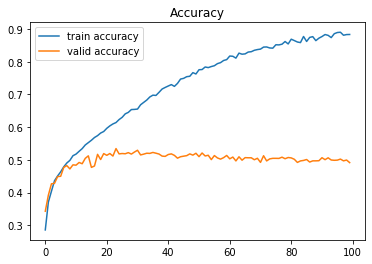

In [25]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()